In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Lenovo'

In [3]:
data=pd.read_csv("C:/Users/Lenovo/Desktop/data science KNTU/part8/DataSet_LakasP.csv")

In [4]:
data.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31


In [5]:
data.shape

(78542, 22)

In [6]:
data.isnull().sum()

county                         0
city                         559
postcode                   28955
property_type                  0
property_subtype            1659
property_condition_type        0
property_floor              3796
building_floor_count       42113
view_type                  35664
orientation                30895
garden_access              61342
heating_type               11309
elevator_type              14154
room_cnt                       0
small_room_cnt                 0
created_at                     0
property_area                  0
balcony_area                   0
price_created_at               0
ad_view_cnt                    0
active_days                    0
nr                             0
dtype: int64

In [7]:
data.isnull().sum()/data.shape[0]

county                     0.000000
city                       0.007117
postcode                   0.368656
property_type              0.000000
property_subtype           0.021122
property_condition_type    0.000000
property_floor             0.048331
building_floor_count       0.536184
view_type                  0.454076
orientation                0.393356
garden_access              0.781009
heating_type               0.143987
elevator_type              0.180209
room_cnt                   0.000000
small_room_cnt             0.000000
created_at                 0.000000
property_area              0.000000
balcony_area               0.000000
price_created_at           0.000000
ad_view_cnt                0.000000
active_days                0.000000
nr                         0.000000
dtype: float64

In [8]:
data_train=data.drop("price_created_at",axis=1)

In [9]:
data_target=data["price_created_at"]

In [10]:
data.drop(["garden_access",],axis=1)

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78537,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,...,none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169
78538,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,...,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174
78539,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,...,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176
78540,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,...,none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179


In [11]:
data.shape

(78542, 22)

In [12]:
data_train["city"].shape

(78542,)

In [13]:
data["city"].shape

(78542,)

In [14]:
data_train=pd.get_dummies(data,columns=["city"])

In [15]:
data.corr()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
postcode,1.000000,-0.044421,0.138252,0.013020,0.097432,-0.280295,0.005962,-0.006547,-0.031367
room_cnt,-0.044421,1.000000,-0.346121,0.592991,0.090463,0.292736,0.003587,0.053267,-0.023959
small_room_cnt,0.138252,-0.346121,1.000000,0.256398,0.084885,0.041483,0.016808,-0.021488,-0.004059
property_area,0.013020,0.592991,0.256398,1.000000,0.167789,0.451574,-0.012860,0.063829,-0.026756
balcony_area,0.097432,0.090463,0.084885,0.167789,1.000000,0.227997,0.020939,0.020348,0.008069
price_created_at,-0.280295,0.292736,0.041483,0.451574,0.227997,1.000000,-0.072848,0.082049,0.193351
ad_view_cnt,0.005962,0.003587,0.016808,-0.012860,0.020939,-0.072848,1.000000,0.350455,-0.090797
active_days,-0.006547,0.053267,-0.021488,0.063829,0.020348,0.082049,0.350455,1.000000,-0.151010
nr,-0.031367,-0.023959,-0.004059,-0.026756,0.008069,0.193351,-0.090797,-0.151010,1.000000


<AxesSubplot:>

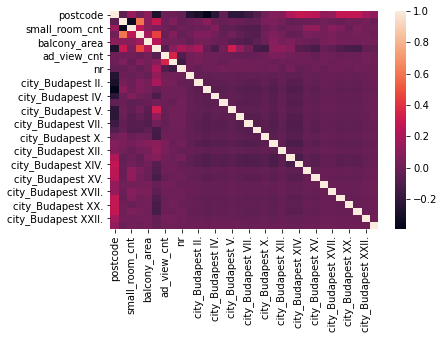

In [16]:
import seaborn as sn
sn.heatmap(data_train.corr())

In [17]:
#because city and price have a low corr we drop city column from data_train
#data_train=data.drop("city",axis=1)

In [18]:
data[data["city"].isnull()]["postcode"].isna().sum() /data[data["city"].isnull()].shape[0]

1.0

In [19]:
data["property_area"].value_counts(ascending=True,dropna=False)

5.0        13
10.0       60
15.0      174
20.0      566
25.0     3403
70.0     4938
30.0     5799
40.0     6727
65.0     7342
60.0     7974
35.0     8816
45.0     8838
55.0    11943
50.0    11949
Name: property_area, dtype: int64

In [20]:
data["garden_access"].value_counts(ascending=True,dropna=False)

yes      2783
none    14417
NaN     61342
Name: garden_access, dtype: int64

In [21]:
data_train["garden_access"].replace({"yes":1,"none":0,np.nan:0},inplace=True)

In [22]:
data_train["garden_access"].value_counts(ascending=True,dropna=False)

1     2783
0    75759
Name: garden_access, dtype: int64

In [23]:
data["postcode"].value_counts(ascending=True,dropna=False)

1239.0        2
1185.0        3
1110.0        3
1046.0       18
1215.0       18
          ...  
1156.0      980
1134.0      983
1135.0     1366
1039.0     1396
NaN       28955
Name: postcode, Length: 162, dtype: int64

In [24]:
data_train["postcode"].fillna(method="bfill",inplace=True)

In [25]:
data_train["postcode"].isna().sum()

0

In [26]:
data["county"].value_counts()

Budapest    78542
Name: county, dtype: int64

In [27]:
data_train["property_subtype"].value_counts(ascending=True,dropna=False)

NaN                                     1659
prefabricated panel flat (for sale)    19802
brick flat (for sale)                  57081
Name: property_subtype, dtype: int64

In [28]:
data_train["property_condition_type"].value_counts(ascending=True,dropna=False)

under_construction       10
can_move_in             394
new_construction       2940
missing_info           3558
to_be_renovated        6113
medium                10958
renewed               12140
novel                 15698
good                  26731
Name: property_condition_type, dtype: int64

In [29]:
data_train["property_floor"].value_counts(ascending=True,dropna=False)

basement             441
10 plus              486
9                   1615
10                  1681
8                   1712
7                   1841
6                   2530
5                   3492
mezzanine floor     3677
NaN                 3796
4                   6632
3                  10716
ground floor       12346
2                  12890
1                  14687
Name: property_floor, dtype: int64

In [30]:
data_train["property_floor"].replace({"basement":-1,"10 plus":11,"mezzanine floor":1,np.nan:0,"ground floor":0},inplace=True)

In [31]:
data_train["property_floor"].value_counts(ascending=True,dropna=False)

-1      441
11      486
9      1615
10     1681
8      1712
7      1841
6      2530
5      3492
1      3677
4      6632
3     10716
2     12890
1     14687
0     16142
Name: property_floor, dtype: int64

In [32]:
data_train["building_floor_count"].value_counts(ascending=True,dropna=False)

9                 687
8                 689
more than 10      834
1                 992
7                1132
6                1702
5                3176
2                3411
10               7698
3                7810
4                8298
NaN             42113
Name: building_floor_count, dtype: int64

In [33]:
data_train["building_floor_count"].replace({"more than 10":11,np.nan:0},inplace=True)

In [34]:
data_train["building_floor_count"].value_counts(ascending=True,dropna=False)

9       687
8       689
11      834
1       992
7      1132
6      1702
5      3176
2      3411
10     7698
3      7810
4      8298
0     42113
Name: building_floor_count, dtype: int64

In [35]:
data_train["view_type"].value_counts(ascending=True,dropna=False)

panoramic          5142
courtyard view     9463
garden view       11090
street view       17183
NaN               35664
Name: view_type, dtype: int64

In [36]:
data_train["elevator_type"].value_counts(ascending=True,dropna=False)

NaN     14154
none    29326
yes     35062
Name: elevator_type, dtype: int64

In [37]:
data_train["elevator_type"].replace({"yes":1,"none":0,np.nan:0},inplace=True)

In [60]:
features=[
'city_Budapest I.',
'city_Budapest II.', 'city_Budapest III.', 'city_Budapest IV.',
'city_Budapest IX.', 'city_Budapest V.', 'city_Budapest VI.',
'city_Budapest VII.', 'city_Budapest VIII.', 'city_Budapest X.',
'city_Budapest XI.', 'city_Budapest XII.', 'city_Budapest XIII.',
'city_Budapest XIV.', 'city_Budapest XIX.', 'city_Budapest XV.',
'city_Budapest XVI.', 'city_Budapest XVII.', 'city_Budapest XVIII.',
'city_Budapest XX.', 'city_Budapest XXI.', 'city_Budapest XXII.',
'city_Budapest XXIII.',
"postcode",
"property_floor",
"building_floor_count",
"garden_access",
"elevator_type",
"room_cnt",
"small_room_cnt",
"property_area",
"balcony_area"
]
target = 'price_created_at'

In [39]:
data_train.columns

Index(['county', 'postcode', 'property_type', 'property_subtype',
       'property_condition_type', 'property_floor', 'building_floor_count',
       'view_type', 'orientation', 'garden_access', 'heating_type',
       'elevator_type', 'room_cnt', 'small_room_cnt', 'created_at',
       'property_area', 'balcony_area', 'price_created_at', 'ad_view_cnt',
       'active_days', 'nr', 'city_Budapest I.', 'city_Budapest II.',
       'city_Budapest III.', 'city_Budapest IV.', 'city_Budapest IX.',
       'city_Budapest V.', 'city_Budapest VI.', 'city_Budapest VII.',
       'city_Budapest VIII.', 'city_Budapest X.', 'city_Budapest XI.',
       'city_Budapest XII.', 'city_Budapest XIII.', 'city_Budapest XIV.',
       'city_Budapest XIX.', 'city_Budapest XV.', 'city_Budapest XVI.',
       'city_Budapest XVII.', 'city_Budapest XVIII.', 'city_Budapest XX.',
       'city_Budapest XXI.', 'city_Budapest XXII.', 'city_Budapest XXIII.'],
      dtype='object')

In [40]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78542 entries, 0 to 78541
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county                   78542 non-null  object 
 1   postcode                 78542 non-null  float64
 2   property_type            78542 non-null  object 
 3   property_subtype         76883 non-null  object 
 4   property_condition_type  78542 non-null  object 
 5   property_floor           78542 non-null  object 
 6   building_floor_count     78542 non-null  object 
 7   view_type                42878 non-null  object 
 8   orientation              47647 non-null  object 
 9   garden_access            78542 non-null  int64  
 10  heating_type             67233 non-null  object 
 11  elevator_type            78542 non-null  int64  
 12  room_cnt                 78542 non-null  float64
 13  small_room_cnt           78542 non-null  float64
 14  created_at            

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train ,x_test,y_train,y_test= train_test_split(data_train[features],data_target,random_state=42,test_size=.30)

In [42]:
x_train.shape ,y_train.shape

((54979, 32), (54979,))

In [43]:
model=LinearRegression()

In [44]:
model

LinearRegression()

In [45]:
model.fit(x_train ,y_train)

LinearRegression()

In [46]:
oneflat=data_train.iloc[0]
oneflat

county                                  Budapest
postcode                                  1016.0
property_type                               flat
property_subtype           brick flat (for sale)
property_condition_type                     good
property_floor                                 1
building_floor_count                           0
view_type                            street view
orientation                                  NaN
garden_access                                  0
heating_type                    tile stove (gas)
elevator_type                                  1
room_cnt                                     2.0
small_room_cnt                               1.0
created_at                            2015-02-09
property_area                               65.0
balcony_area                                 0.0
price_created_at                            23.5
ad_view_cnt                                605.0
active_days                                119.0
nr                  

In [47]:
model.predict(  [  oneflat[features]  ]  )

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([30.30033568])

In [48]:
predictions=model.predict(x_test)
predictions

array([22.43696639, 17.3491843 , 24.67329826, ..., 25.81136162,
       14.28288971, 18.39682698])

In [49]:
len(predictions)

23563

In [50]:
len(y_test)

23563

In [51]:
test=y_test.to_frame(name="real")

In [52]:
prediction=pd.DataFrame(predictions,columns=["predictions"])

In [53]:
prediction

,predictions
0,22.436966
1,17.349184
2,24.673298
3,15.088496
4,11.877200
...,...
23558,28.672706
23559,16.161051
23560,25.811362
23561,14.282890


In [54]:
test["pred"]=predictions

In [55]:
test

,real,pred
45195,22.9,22.436966
54784,12.9,17.349184
73952,27.0,24.673298
24326,13.5,15.088496
61688,14.0,11.877200
...,...,...
39011,30.0,28.672706
71061,18.5,16.161051
44627,36.0,25.811362
8128,16.0,14.282890


In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['real'], test['pred']) ** 0.5

5.883699687600619

In [57]:
test.max()

real    96.000000
pred    63.847967
dtype: float64

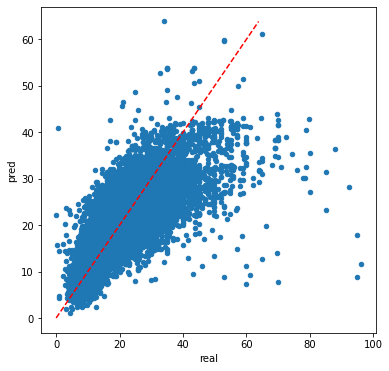

In [58]:
test.plot.scatter(x='real', y='pred', figsize=(6,6))
plt.plot([0,test.max().min()], [0, test.max().min()], 'r--')